In [1]:
import seaborn as sns
df = sns.load_dataset('iris')

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [3]:
y = df['species']
X = df.drop(columns='species')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# If n_components not mentioned then it is by default taken as no. of columns equal to X
# If 0 < n_components < 1 then the number of components such that the total amount of variance by n_components is less than  that mentioned.
X_r_train = pca.fit(X_train).transform(X_train)

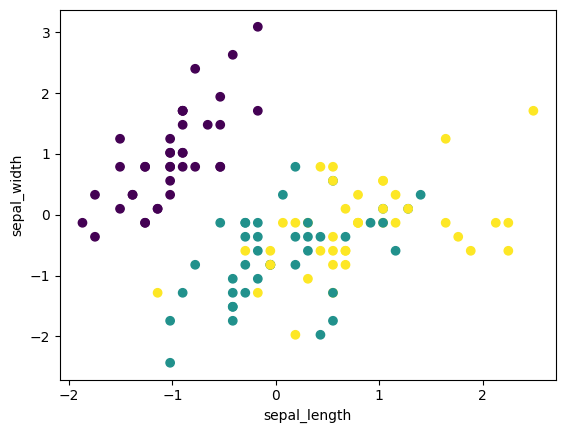

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap="viridis")
plt.show()

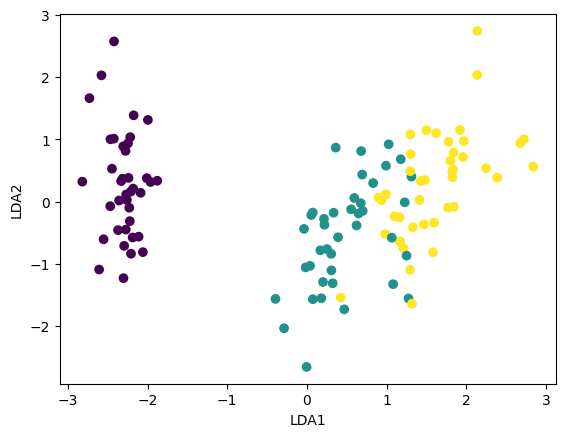

In [8]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(X_r_train[:,0],X_r_train[:,1],c=y_train,cmap="viridis")
plt.show()

In [9]:
import numpy as np
print("No. of components :", pca.n_components_)
print("Variance Ratios: ", pca.explained_variance_ratio_)
print("Total variance : ", np.sum(pca.explained_variance_ratio_)*100 , "%")
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i + 1}: {component}")

No. of components : 3
Variance Ratios:  [0.73151721 0.22377426 0.03920632]
Total variance :  99.44977930414312 %
Principal Component 1: [ 0.4980871  -0.3142765   0.5757605   0.56713259]
Principal Component 2: [0.40533788 0.90768397 0.04949774 0.09675221]
Principal Component 3: [-0.71864603  0.24597412  0.12777209  0.63774518]


### PCA on digits

In [10]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
print(dataset.data.shape)
# so there are 1797 arrays of length each 64 
# the image was 8 x 8 but it was reshaped to 64 x 1
# now we will reshape it back to 8 x 8 

print(dataset.target) # this give the output to df.data
print("length of target array :", len(dataset.target))

(1797, 64)
[0 1 2 ... 8 9 8]
length of target array : 1797


Output mentioned in db is :  4
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


<Figure size 640x480 with 0 Axes>

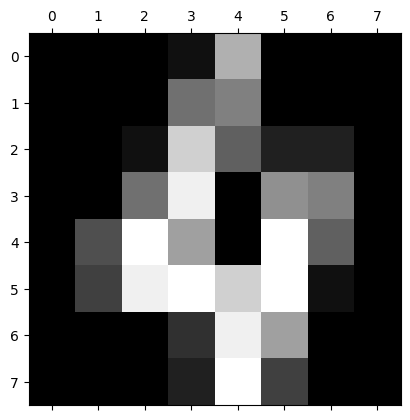

In [22]:
# for example
index = 4
print("Output mentioned in db is : ",dataset.target[index])
print(dataset.data[index].reshape(8,8))
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.data[index].reshape(8,8))
plt.show()

In [13]:
import pandas as pd
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
X = df
y = dataset.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# reduce dimensions from 64 to x such that most of variance is retained
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X)
print("Shape of new df after PCA :", X_pca.shape)
print("No. of components :", pca.n_components_)
print("So, from",X.shape[1], "to",X_pca.shape[1], "is a reduction by", X.shape[1]/X_pca.shape[1], "times")
print("Variance Ratios: ", pca.explained_variance_ratio_)

Shape of new df after PCA : (1797, 31)
No. of components : 31
So, from 64 to 31 is a reduction by 2.064516129032258 times
Variance Ratios:  [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model1 = LogisticRegression(max_iter=100)
model1.fit(X_train, y_train)
print("Normal Log Reg accuracy :",model1.score(X_test, y_test))

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2)
model2 = LogisticRegression(max_iter=100)
model2.fit(X_pca_train, y_pca_train)
print("PCA Log Reg accuracy :", model2.score(X_pca_test, y_pca_test))

Normal Log Reg accuracy : 0.9555555555555556
PCA Log Reg accuracy : 0.9527777777777777


c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


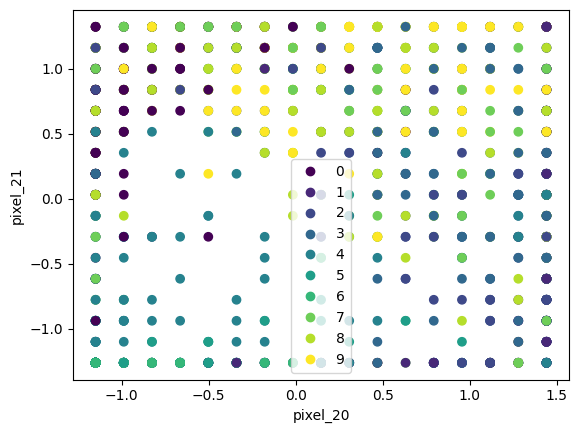

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('pixel_20')
plt.ylabel('pixel_21')
scatter = plt.scatter(X_train[:,20],X_train[:,21],c=y_train,cmap="viridis")
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)
plt.show()

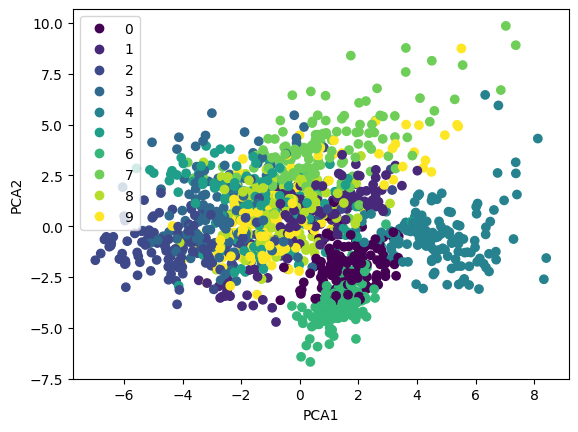

In [18]:
plt.xlabel('PCA1')
plt.ylabel('PCA2')
scatter = plt.scatter(X_pca_train[:,0],X_pca_train[:,1],c=y_pca_train,cmap="viridis")
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)
plt.show()

### LDA vs PCA 
(Spoiler : LDA gives better visiblity separation)

In [19]:
import seaborn as sns
df = sns.load_dataset('iris')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

y = df['species']
X = df.drop(columns='species')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

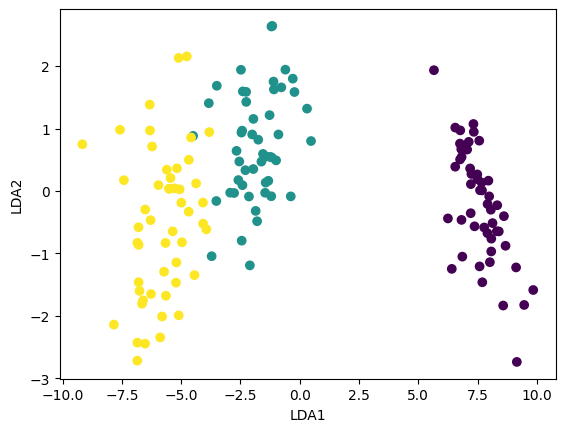

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap="viridis")
plt.show()

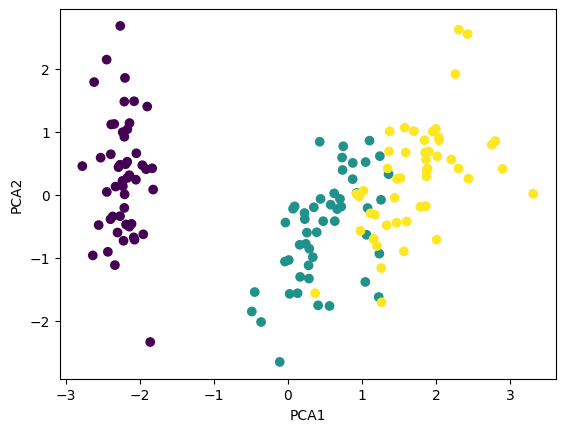

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap="viridis")
plt.show()